<a href="https://colab.research.google.com/github/Santacaterina/data_analysis_project/blob/main/train_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive #para lograr el enlace con Drive
import os
import seaborn as sns
import textwrap #Esto para colocar una nota grande en el grafico

In [ ]:
# @title Se conecta con Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = '/content/drive/My Drive/Colab Notebooks/kaggle'
os.chdir(folder_path)

In [ ]:
folder_path = '/content/drive/My Drive/Colab Notebooks/kaggle'
files_in_folder = os.listdir(folder_path)
print(files_in_folder)

['train.csv', 'train_clean.csv', 'train_colab.ipynb']


In [ ]:
df= pd.read_csv('train.csv')

Auditoria inicial

---



In [ ]:
df.shape

(9800, 18)

In [ ]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
df.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
count,9800.000000,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9789.000000,9800,9800,9800,9800,9800,9800.000000
unique,NaN,4922,1230,1326,4,793,793,3,1,529,49,NaN,4,1861,3,17,1849,NaN
top,NaN,CA-2018-100111,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN
freq,NaN,14,38,34,5859,35,35,5101,9800,891,1946,NaN,3140,19,5909,1492,47,NaN
mean,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55273.322403,NaN,NaN,NaN,NaN,NaN,230.769059
std,2829.160653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32041.223413,NaN,NaN,NaN,NaN,NaN,626.651875
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000
25%,2450.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.248000
50%,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58103.000000,NaN,NaN,NaN,NaN,NaN,54.490000
75%,7350.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,210.605000


Limpieza de data

---



In [ ]:
df.columns = (df.columns.str.lower().str.replace(' ', '_'))

In [ ]:
df = df.drop(columns=['row_id'], errors='ignore')

In [ ]:
df.isnull().sum()

,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_id,0
customer_name,0
segment,0
country,0
city,0
state,0


In [ ]:
null_postal_code_rows = df[df['postal_code'].isnull()]
display(null_postal_code_rows)

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales
2234,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [ ]:
df = df.dropna(subset=['postal_code'])

In [ ]:
df.isnull().sum()

,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_id,0
customer_name,0
segment,0
country,0
city,0
state,0


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df = df[df['sales'] > 0]

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')


In [ ]:
df

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,2017-12-06,NaT,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,2016-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,2016-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,NaT,NaT,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,CA-2016-128608,2016-12-01,NaT,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,CA-2016-128608,2016-12-01,NaT,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,CA-2016-128608,2016-12-01,NaT,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [ ]:
df['order_year'] = df['order_date'].dt.year
df['order_month_num'] = df['order_date'].dt.month
df['order_month_name'] = df['order_date'].dt.month_name()
df['order_day'] = df['order_date'].dt.day

In [ ]:
df['order_year'] = df['order_year'].astype('Int64')
df['order_month_num'] = df['order_month_num'].astype('Int64')

In [ ]:
df['shopping_days'] = (df['ship_date'] - df['order_date']).dt.days
df= df[df['shopping_days'].isna() | (df['shopping_days'] >= 0)]
df['shopping_days']

,shopping_days
0,92.0
1,92.0
2,NaN
3,NaN
4,NaN
...,...
9795,NaN
9796,NaN
9797,NaN
9798,NaN


In [ ]:
df['region'].value_counts()

,count
region,
West,3140
East,2774
Central,2277
South,1598


In [ ]:
df['category'].value_counts()

,count
category,
Office Supplies,5903
Furniture,2076
Technology,1810


In [ ]:
df['postal_code'] = df['postal_code'].astype('Int64').astype('str')
df['postal_code']

,postal_code
0,42420
1,42420
2,90036
3,33311
4,33311
...,...
9795,60610
9796,43615
9797,43615
9798,43615


In [ ]:
for col in ['region', 'category', 'segment', 'state', 'city']:
    df[col] = df[col].str.strip().str.title()

**for col in ['region', 'category', 'segment', 'state']::** Este bucle itera sobre cada nombre de columna especificado en la lista.

**df[col] = df[col].str.strip():** Para cada columna, str.strip() elimina cualquier espacio en blanco (como espacios, tabulaciones o saltos de línea) del principio y del final de cada cadena de texto en esa columna. Esto es útil para limpiar datos que pueden tener espacios extra involuntarios, lo que podría hacer que valores idénticos se traten como diferentes (por ejemplo, ' West' vs 'West').

**.str.title():** Después de eliminar los espacios en blanco, str.title() convierte la primera letra de cada palabra en mayúscula y el resto de las letras en minúscula. Por ejemplo, 'office supplies' se convertiría en 'Office Supplies'. Esto asegura una capitalización consistente en toda la columna, lo que es esencial para el análisis y la agrupación de datos categóricos (por ejemplo, para que 'furniture' y 'Furniture' se consideren el mismo valor).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          9789 non-null   object        
 1   order_date        3955 non-null   datetime64[ns]
 2   ship_date         3811 non-null   datetime64[ns]
 3   ship_mode         9789 non-null   object        
 4   customer_id       9789 non-null   object        
 5   customer_name     9789 non-null   object        
 6   segment           9789 non-null   object        
 7   country           9789 non-null   object        
 8   city              9789 non-null   object        
 9   state             9789 non-null   object        
 10  postal_code       9789 non-null   object        
 11  region            9789 non-null   object        
 12  product_id        9789 non-null   object        
 13  category          9789 non-null   object        
 14  sub-category      9789 non-nu

In [ ]:
df

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,...,product_id,category,sub-category,product_name,sales,order_year,order_month_num,order_month_name,order_day,shopping_days
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,8,August,11.0,92.0
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,8,August,11.0,92.0
2,CA-2017-138688,2017-12-06,NaT,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017,12,December,6.0,NaN
3,US-2016-108966,2016-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,11,November,10.0,NaN
4,US-2016-108966,2016-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,11,November,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,NaT,NaT,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,...,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,<NA>,<NA>,NaN,NaN,NaN
9796,CA-2016-128608,2016-12-01,NaT,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,...,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016,12,December,1.0,NaN
9797,CA-2016-128608,2016-12-01,NaT,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,...,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2016,12,December,1.0,NaN
9798,CA-2016-128608,2016-12-01,NaT,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,...,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016,12,December,1.0,NaN


Existe una cantidad considerable de valores **NaT** en las columnas order_date y ship_date, lo que puede deberse a pedidos incompletos o pedidos que aún no han sido enviados.

La eliminación de estos registros implicaría una reducción significativa del dataset, pasando de 9,789 filas a aproximadamente 2,700, es decir, una pérdida superior al 60% de la información disponible.

Eliminar una proporción tan alta de datos podría generar una interpretación sesgada de los resultados y afectar negativamente la representatividad del análisis.

Dado que en este analisis se basa en otros aspecto no se necesita tener valores de calidad en columnas de fechas, se decidió conservar estos registros, ya que su eliminación también impactaría otras variables clave para el análisis de ventas y comportamiento del cliente donde si se necesita una gran cantidad de data.

In [ ]:
nat_values_df = df[df['ship_date'].isnull() |
                   df['order_date'].isnull() |
                   df['order_year'].isnull() |
                   df['order_month_num'].isnull() |
                   df['order_day'].isnull()]

In [ ]:
df['sales'].describe()
df['shopping_days'].describe()

,shopping_days
count,2672.000000
mean,106.999251
std,54.289275
min,0.000000
25%,61.000000
50%,122.000000
75%,153.000000
max,214.000000


In [ ]:
df[df['sales'] < 0]

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,...,product_id,category,sub-category,product_name,sales,order_year,order_month_num,order_month_name,order_day,shopping_days


In [ ]:
df_full = df.copy()
df_time = df.dropna(subset=['order_date'])
df_shopping = df.dropna(subset=['order_date', 'ship_date'])

In [ ]:
required_cols = ['sales', 'category', 'region']

missing = [col for col in required_cols if col not in df.columns]
if missing:
    raise ValueError(f"Missing required columns: {missing}")


In [ ]:
#df.to_csv('train_clean.csv', index=False)

Inicio de graficar

---



In [ ]:
df['sales'].quantile([0.01, 0.99])

,sales
0.01,2.2860
0.99,2456.6136


-2.2860 (Percentil 1): Significa que el 1% de las ventas son iguales o inferiores a 2.2860. Esto indica que se tiene un pequeño porcentaje de ventas con valores muy bajos.

-2456.6136 (Percentil 99): Significa que el 99% de las ventas son iguales o inferiores a 2456.6136. O, es decir, solo el 1% de las ventas superan los 2456.6136. es decir que hay algunas ventas excepcionalmente altas en los datos.

Ventas totales por categoria

---



In [ ]:
#Preparacion para ver que lineas de negocio genera mas ingreso
sales_by_category = (df.groupby('category')['sales'].sum().sort_values(ascending=False))

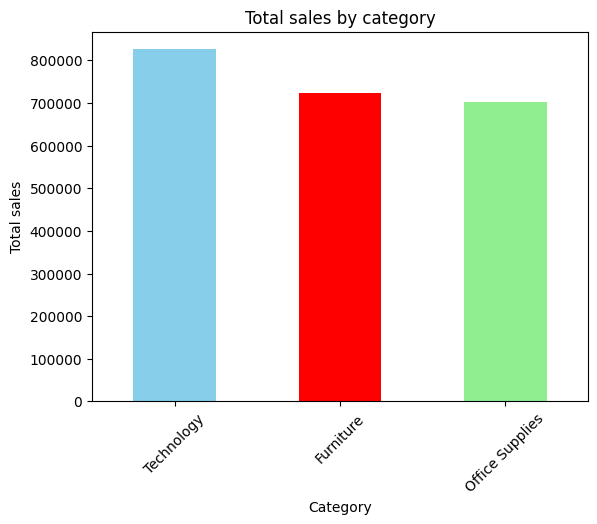

In [ ]:
colors = ['skyblue', 'red', 'lightgreen'] #definir colores
sales_by_category.plot(kind='bar', color=colors)
plt.title('Total sales by category')
plt.xlabel('Category')
plt.ylabel('Total sales')
plt.xticks(rotation=45)
plt.show()

**Aquí se muestra:**
*   Diferencias claras entre categorías
*   Una o dos categorías concentran la mayor parte de las ventas

**Se pudiera decir que:**

No todas las categorías aportan el mismo valor al negocio. Algunas categorías son claramente más relevantes en términos de ingresos, por ejemplo, technology la cual no solo lidera en ventas, sino que probablemente concentra los productos de mayor ticket promedio.

**Conclusión**

El negocio puede:
*   Priorizar las categorías más fuertes
*   Analizar si las categorías más débiles requieren ajustes en precio, promoción o catálogo

Ventas por Region

---



In [ ]:
#Preparacion para detectar las regiones con mejores ventas
sales_by_region = (df.groupby('region')['sales'].sum().sort_values(ascending=False))

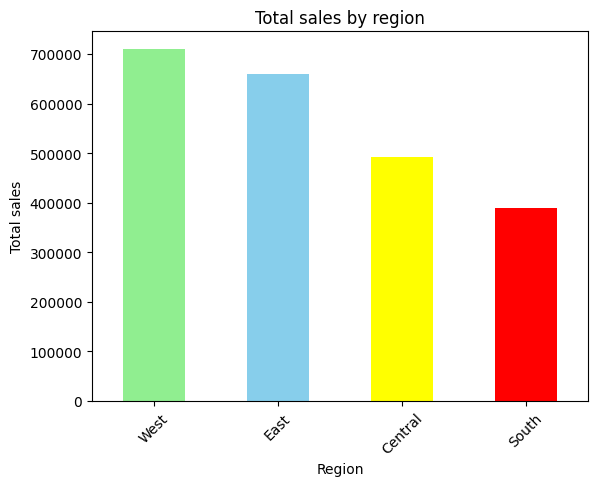

In [ ]:
colors_region = ['lightgreen', 'skyblue', 'yellow', 'red']
sales_by_region.plot(kind='bar', color=colors_region)
plt.title('Total sales by region')
plt.xlabel('Region')
plt.ylabel('Total sales')
plt.xticks(rotation=45)
plt.show()

**Aquí se muestra:**
*   Regiones con mayor volumen de ventas
*   Regiones con menor participación

**Se pudiera decir que:**

El desempeño comercial varía según la región. Algunas zonas generan más ingresos que otras. Esto pudiera asomar la posibilidad que las zonas donde las ventas son menores (por ejemplo la zona central y south) pueden estar asociadas a factores externos como demanda, cobertura logística o estrategias comerciales locales que resten cuota de mercado.

**Conclusión**

Esto puede ayudar a:
*   Enfocar esfuerzos comerciales en regiones clave
*   Investigar por qué ciertas regiones venden menos (demanda, logística, cobertura)



Ventas por segmentacion de clientes

---



In [ ]:
sales_by_segment = (df.groupby('segment')['sales'].sum().sort_values(ascending=False))

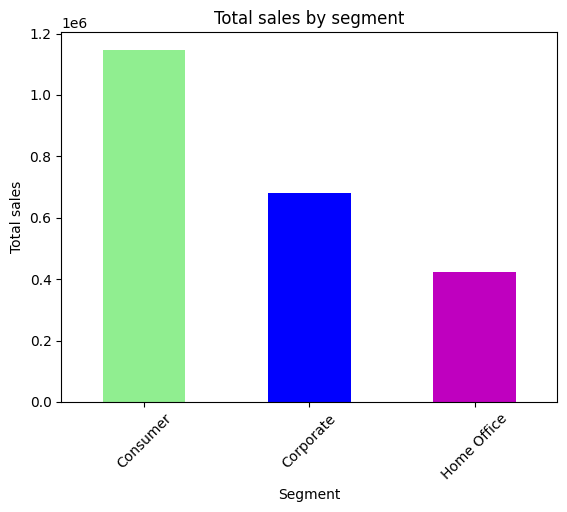

In [ ]:
sales_by_segment.plot(kind='bar', color=['lightgreen', 'blue', 'm'])
plt.title('Total sales by segment')
plt.xlabel('Segment')
plt.ylabel('Total sales')
plt.xticks(rotation=45)
plt.show()

**Aquí se muestra:**
*   Diferencias claras entre tipos de clientes
*   Un segmento destaca por generar más ventas

**Se pudiera decir que:**

No todos los clientes compran de la misma manera ni aportan el mismo valor. Algunos segmentos realizan compras más grandes o más frecuentes. Donde se muestra que los segmentos más bajos son Home Office (por debajo del 50%) seguido por Corporate, pero el de mayor impacto es Consumer
Pudiéramos decir que el segmento Consumer parece ser el motor del volumen de ventas, mientras que Corporate y Home Office podrían representar oportunidades de crecimiento con estrategias específicas.

**Conclusión**

El negocio puede:
*   Identificar su segmento más rentable
*   Diseñar estrategias específicas para cada tipo de cliente

Evolucion de las ventas con el pasar del tiempo(mensual)

---



In [ ]:
df_time = df.dropna(subset=['order_date'])
monthly_sales = (df_time.groupby(['order_year', 'order_month_name'])['sales'].sum().reset_index())

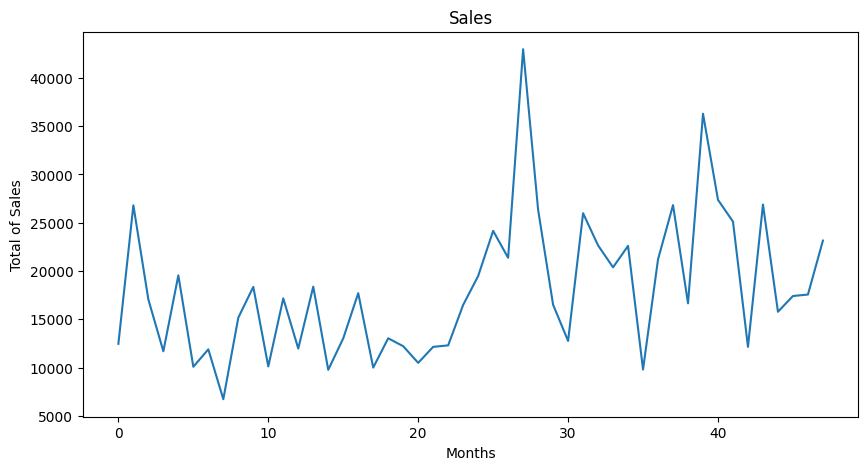

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['sales'])
plt.title('Sales')
plt.xlabel('Months')
plt.ylabel('Total of Sales')
plt.show()

**Aquí se muestra:**
*   Cambios en las ventas a lo largo del tiempo
*   Meses con mayor y menor actividad

**Se pudiera decir que:**

Las ventas no son constantes, existen períodos de mayor actividad y otros más bajos.

**Conclusión**

El negocio puede:
*   Detectar posibles temporadas altas y bajas
*   Planificar inventario y campañas con base en el comportamiento histórico

Tiempo de envio

---



In [ ]:
df_shopping = df.dropna(subset=['shopping_days'])

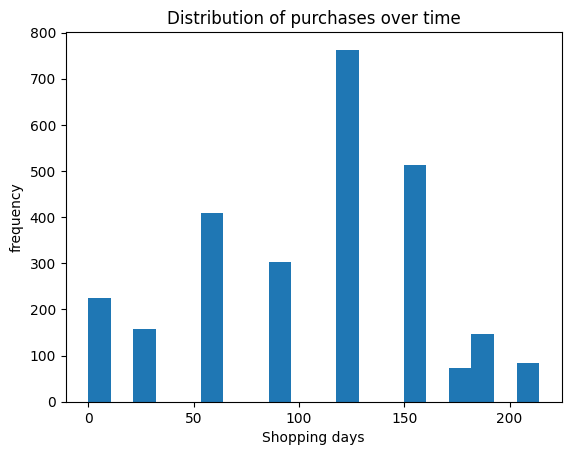

In [ ]:
plt.hist(df_shopping['shopping_days'], bins=20)
plt.title('Distribution of purchases over time')
plt.xlabel('Shopping days')
plt.ylabel('frequency')
plt.show()

**Qué muestra el gráfico**
*   La mayoría de los pedidos se envían en pocos días
*   Algunos pedidos tardan más tiempo en ser enviados

**Interpretación**

En general, el proceso de envío es razonablemente eficiente, aunque existen casos puntuales con mayor demora. Sería ideal evaluar si se pudiera aplicar los 5 por que

**Conclusión**

El negocio puede:
*   Mantener el estándar actual de envío
*   Analizar los casos con mayor demora para mejorar la experiencia del cliente

Distribucion de ventas

---



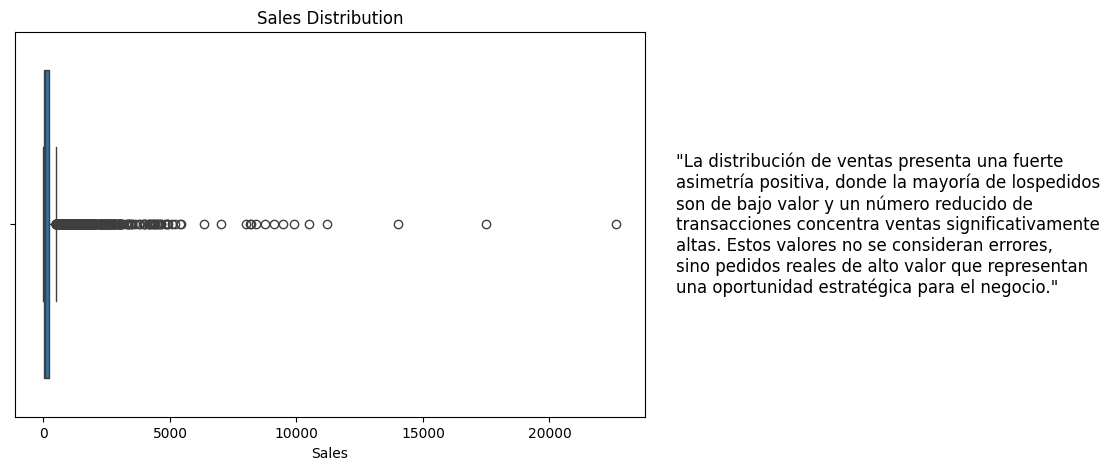

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df['sales'])
plt.xlabel('Sales')
plt.title('Sales Distribution')

nota = ('"La distribución de ventas presenta una fuerte asimetría positiva, donde la mayoría de los'
        'pedidos son de bajo valor y un número reducido de transacciones concentra ventas '
        'significativamente altas. Estos valores no se consideran errores, sino pedidos reales '
        'de alto valor que representan una oportunidad estratégica para el negocio."')

nota_ajusta = textwrap.fill(nota, width=50)

plt.text(1.05, 0.5, nota_ajusta,
         transform=plt.gca().transAxes,
         verticalalignment='center',
         fontsize=12)

# 3. Ajustar el margen para que el texto no se corte
plt.subplots_adjust(right= 0.65)

plt.show()

**Aquí se muestra**
*   Muchas ventas pequeñas concentradas cerca de cero
*   Pocas ventas muy grandes (outliers)
*   Una gran diferencia entre la mayoría de pedidos y unos pocos pedidos especiales

**Se pudiera decir que:**

La tienda realiza muchas ventas de bajo monto, pero una pequeña cantidad de pedidos representa ventas muy altas. Esto pudiera decir que el negocio atiende tanto a clientes minoristas como a clientes que hacen compras grandes. Se observa que Muchas ventas pequeñas sostienen el volumen, pocas ventas grandes impulsan el ingreso.

**Conclusión**

El negocio no depende de un solo tipo de cliente:
*   Las ventas pequeñas sostienen el volumen
*   Las ventas grandes impulsan el ingreso total

Otros graficos

Estos graficos solo estan para apoyar las conclusiones

---



Ventas por encima del cuantil del 75% e inferior al 25%

---



In [ ]:
product_sales = (df_full.groupby('product_id')['sales'].sum())
q25 = product_sales.quantile(0.25)
q75 = product_sales.quantile(0.75)

#Obtener product_ids que tienen ventas totales inferiores a q25 o superiores a q75
extreme_product_ids = product_sales[(product_sales < q25) | (product_sales > q75)].index

# Filtrar df_full para incluir solo filas con estos product_ids extremos
extreme_sales_df = df_full[df_full['product_id'].isin(extreme_product_ids)]
display(extreme_sales_df)

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,...,product_id,category,sub-category,product_name,sales,order_year,order_month_num,order_month_name,order_day,shopping_days
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017,8,August,11.0,92.0
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017,8,August,11.0,92.0
3,US-2016-108966,2016-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,11,November,10.0,NaN
6,CA-2015-115812,2015-09-06,NaT,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,2015,9,September,6.0,NaN
7,CA-2015-115812,2015-09-06,NaT,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,2015,9,September,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9792,CA-2015-127166,NaT,NaT,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,...,FUR-CH-10003396,Furniture,Chairs,Global Deluxe Steno Chair,107.7720,<NA>,<NA>,NaN,NaN,NaN
9793,CA-2015-127166,NaT,NaT,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Houston,Texas,...,OFF-PA-10001560,Office Supplies,Paper,"Adams Telephone Message Books, 5 1/4” x 11”",4.8320,<NA>,<NA>,NaN,NaN,NaN
9797,CA-2016-128608,2016-12-01,NaT,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,...,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2016,12,December,1.0,NaN
9798,CA-2016-128608,2016-12-01,NaT,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,...,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016,12,December,1.0,NaN


Productos con ventas por encima del cuantil 75%

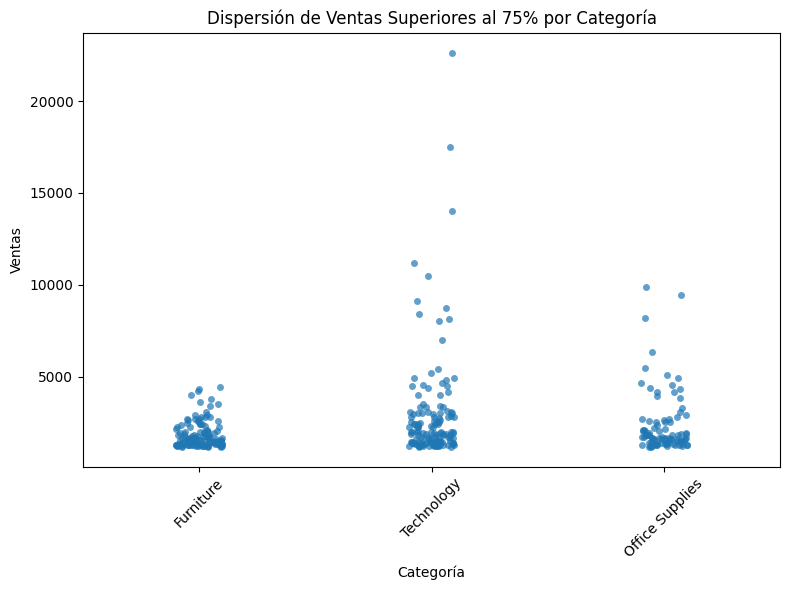

In [ ]:
high_sales = df_full[df_full['sales'] > q75]

plt.figure(figsize=(8, 6))
sns.stripplot(x='category', y='sales', data=high_sales, jitter=True, alpha=0.7)
plt.title('Dispersión de Ventas Superiores al 75% por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Aquí se muestra**

Un gráfico de dispersión donde se observan productos cuyos ingresos totales están por encima del cuantil 75, separados por categoría. Cada punto representa un producto con ventas acumuladas altas.

**Se pudiera decir que:**

El gráfico muestra que los productos de alto desempeño no están concentrados en una sola categoría, sino que aparecen distribuidos entre varias. Sin embargo, algunas categorías presentan mayor densidad de productos con ventas altas, lo que indica un mejor desempeño comercial general. Pero en el caso del segmento Technology tenemos el mayor número de outhliers, seguido por una gran brecha por Office Supplies

**Conclusión**

El negocio no depende de un único tipo de producto para generar altos ingresos. Existen categorías más fuertes, pero el éxito en ventas se reparte entre distintas líneas, lo que reduce el riesgo y abre oportunidades para potenciar varias áreas del catálogo.


In [ ]:
product_counts_high_sales = high_sales['product_id'].value_counts().head(20)
display(product_counts_high_sales)

,count
product_id,
OFF-BI-10003527,8
OFF-BI-10001359,8
FUR-CH-10002024,6
OFF-BI-10000545,6
TEC-CO-10001449,6
TEC-PH-10001459,5
OFF-ST-10000078,5
OFF-SU-10002881,5
TEC-CO-10004722,5


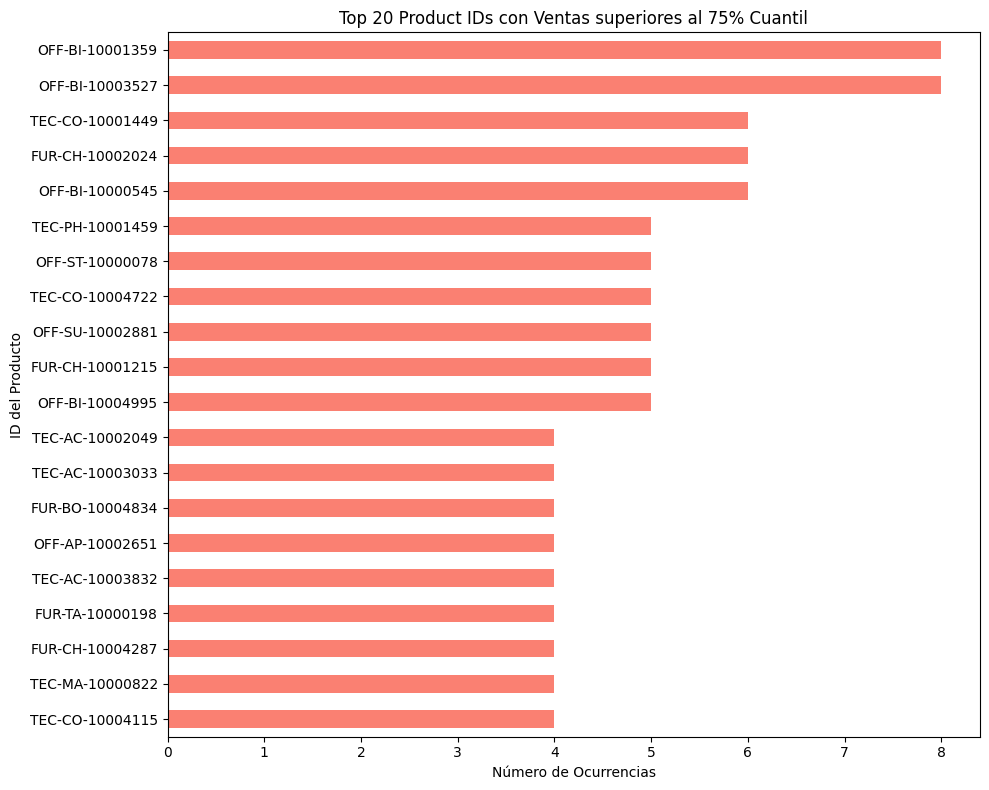

In [ ]:
plt.figure(figsize=(10, 8))
product_counts_high_sales.sort_values(ascending=True).plot(kind='barh', color='salmon')
plt.title('Top 20 Product IDs con Ventas superiores al 75% Cuantil')
plt.xlabel('Número de Ocurrencias')
plt.ylabel('ID del Producto')
plt.tight_layout()
plt.show()

**Aquí se muestra**

Un ranking de los 20 productos con mayores ventas acumuladas, es decir, aquellos que se encuentran claramente por encima del comportamiento promedio.

**Se pudiera decir que:**

Un número reducido de productos concentra una parte importante del ingreso total. Estos productos destacan de forma consistente frente al resto del catálogo. Además, estos productos como el OFF-BI-10001359 y OFF-BI-10003527 son los que generan más ingresos por ventas

**Conclusión**

Estos productos representan activos clave para el negocio.
Pueden ser priorizados para:
*   Estrategias de promoción
*   Gestión de inventario
*   Un análisis adicional de estos productos (precio, margen o demanda) permitiría entender por qué sobresalen.

Productos con ventas por debajo del cuantil 25%

---



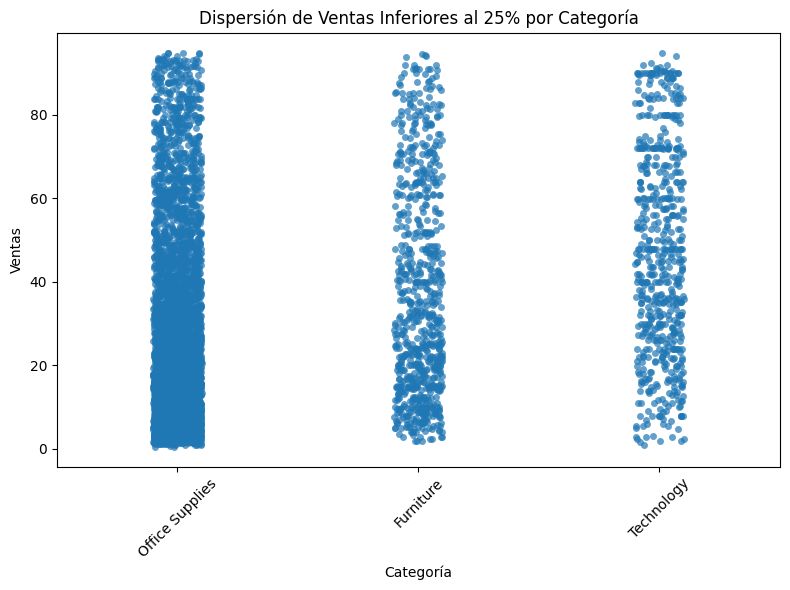

In [ ]:
low_sales = df_full[df_full['sales'] < q25]

plt.figure(figsize=(8, 6))
sns.stripplot(x='category', y='sales', data=low_sales, jitter=True, alpha=0.7)
plt.title('Dispersión de Ventas Inferiores al 25% por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Aquí se muestra**

Un gráfico de dispersión de productos cuyo total de ventas se encuentra por debajo del cuantil 25, segmentados por categoría.

**Se pudiera decir que:**

Se observa que las ventas bajas también están distribuidas entre distintas categorías, sin concentrarse exclusivamente en una sola. Esto sugiere que el bajo desempeño no depende únicamente del tipo de producto, sino posiblemente de otros factores como demanda o visibilidad debido que el bajo desempeño no depende únicamente del tipo de producto

**Conclusión**

Existen productos con bajo rendimiento en varias categorías. Esto no implica que las categorías sean débiles, sino que ciertos productos individuales no están generando suficiente volumen de ventas y podrían requerir revisión.


In [ ]:
product_counts_low_sales = low_sales['product_id'].value_counts().head(20)
display(product_counts_high_sales)

,count
product_id,
OFF-BI-10003527,8
OFF-BI-10001359,8
FUR-CH-10002024,6
OFF-BI-10000545,6
TEC-CO-10001449,6
TEC-PH-10001459,5
OFF-ST-10000078,5
OFF-SU-10002881,5
TEC-CO-10004722,5


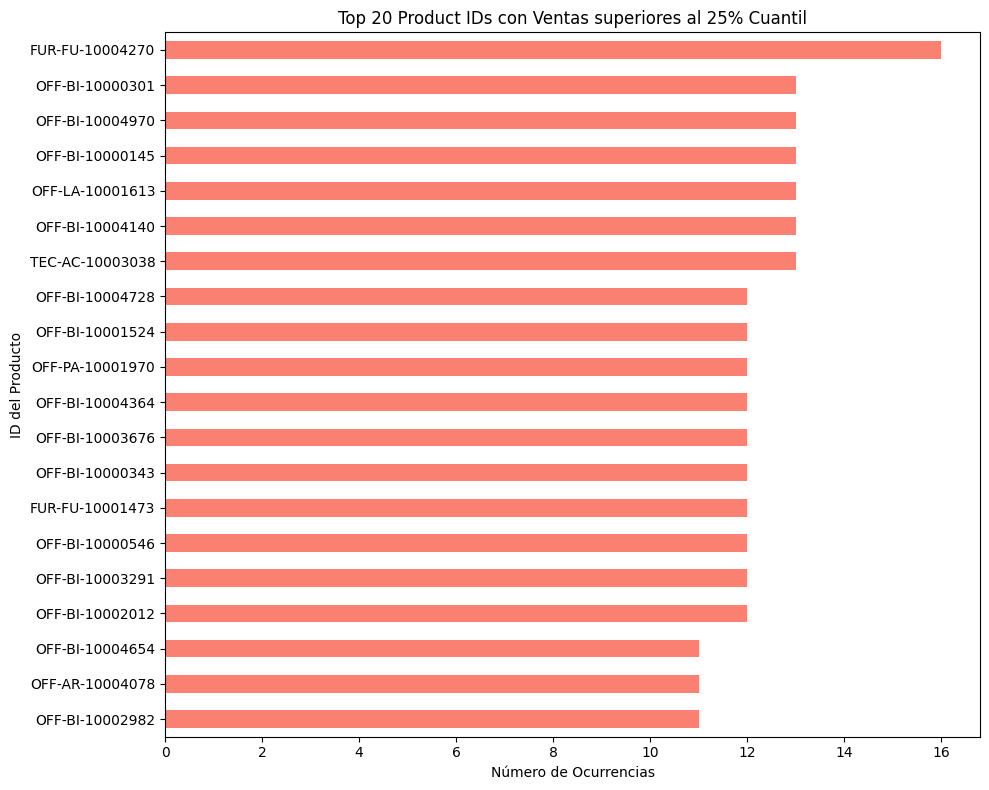

In [ ]:
plt.figure(figsize=(10, 8))
product_counts_low_sales.sort_values(ascending=True).plot(kind='barh', color='salmon')
plt.title('Top 20 Product IDs con Ventas superiores al 25% Cuantil')
plt.xlabel('Número de Ocurrencias')
plt.ylabel('ID del Producto')
plt.tight_layout()
plt.show()

**Aquí se muestra**

Un ranking de los 20 productos con menor volumen de ventas acumuladas dentro del dataset.

**Se pudiera decir que:**

Estos productos presentan un desempeño comercial claramente inferior al resto del catálogo. Su contribución al ingreso total es baja y no tienen un impacto significativo en las ventas globales.

**Conclusión**

Estos productos podrían ser candidatos para:
*   Revisión de estrategia comercial
*   Ajustes de precio
*   Promociones específicas
*   Evaluación de continuidad en el catálogo

In [ ]:
df_filtered = df[df['product_id'] == 'OFF-BI-10001359']
display(df_filtered)

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,...,product_id,category,sub-category,product_name,sales,order_year,order_month_num,order_month_name,order_day,shopping_days
1896,CA-2018-141789,2018-03-10,2018-06-10,First Class,AC-10450,Amy Cox,Consumer,United States,Minneapolis,Minnesota,...,OFF-BI-10001359,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,1793.980,2018,3,March,10.0,92.0
2848,CA-2018-157854,2018-08-04,NaT,Standard Class,DM-13345,Denise Monton,Corporate,United States,Roswell,Georgia,...,OFF-BI-10001359,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,2690.970,2018,8,August,4.0,NaN
3324,CA-2015-165309,2015-11-11,NaT,Standard Class,KD-16270,Karen Daniels,Consumer,United States,Houston,Texas,...,OFF-BI-10001359,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,896.990,2015,11,November,11.0,NaN
3459,CA-2018-136448,NaT,NaT,First Class,AS-10090,Adam Shillingsburg,Consumer,United States,Philadelphia,Pennsylvania,...,OFF-BI-10001359,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,538.194,<NA>,<NA>,NaN,NaN,NaN
4860,CA-2017-101546,NaT,NaT,Standard Class,GK-14620,Grace Kelly,Corporate,United States,Morristown,New Jersey,...,OFF-BI-10001359,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,1793.980,<NA>,<NA>,NaN,NaN,NaN
6048,CA-2016-105571,2016-07-11,2016-11-11,Standard Class,CP-12340,Christine Phan,Corporate,United States,Miami,Florida,...,OFF-BI-10001359,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,1345.485,2016,7,July,11.0,123.0
6534,CA-2015-128209,NaT,NaT,Standard Class,GT-14710,Greg Tran,Consumer,United States,Buffalo,New York,...,OFF-BI-10001359,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,2152.776,<NA>,<NA>,NaN,NaN,NaN
7898,CA-2018-128363,NaT,NaT,Standard Class,DC-12850,Dan Campbell,Consumer,United States,Memphis,Tennessee,...,OFF-BI-10001359,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,1614.582,<NA>,<NA>,NaN,NaN,NaN
9033,CA-2015-152268,2015-02-09,2015-07-09,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Fayetteville,Arkansas,...,OFF-BI-10001359,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,1793.980,2015,2,February,9.0,150.0
9270,US-2018-102183,NaT,NaT,Standard Class,PK-19075,Pete Kriz,Consumer,United States,New York City,New York,...,OFF-BI-10001359,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,4305.552,<NA>,<NA>,NaN,NaN,NaN


Ver conclusiones generales en el archivo pdf 